# A Gentle introduction to Markov Process
## A Hands on Python Codes in the case of Inventory Managements

Data scientist deal a lot with **Process** where the process is time indexed and follow a uncertain path. Imagien for examample you work in Energy Business and you need to keep track of uncrtain path of commodity price. The commodity price (like Oil) for example will follow a path at time variable $t=0, 1, 2, \cdots$. This is a **uncertain** Process where it was inexed by time. However, if we want do caluclation for making decsion and calcuate rewrd of the process, wee need to **internatlly ** reprsent the proecss. 


The internall represntaion of the uncertain process is called **State**. Lets back to example of Oil Price. An lets say today oil price is 100$. I can repsrent that informaton with saying $S_0= 100\$$, then tomoor the price will be diffrent, can be repsented $S_1$ and this list goes $S0, S_1, S_2,...$.



Here in this short log, we want to talk anbout Markov Process. As you can from the name, Markowv Process deal with a uncertain path. It mean Markov Process is sequence of random states $S_t \in \mathcal{S}$, as at time $t=0,1,2,3,\cdots$, we can reprsent the process with:

$$S_0, S_1,S_2,\cdots,S_{t-1},S_{t}$$

Where in the above example the the process is like, 

### Markov Property

We call the process ahs Markov Property where the transition of states has **Markov Property**, menaing:


$$\mathbb{P}[S_{t+1}|S_t,S_{t-1},\cdots, S_0] = \mathbb{P}[S_{t+1}|S_t]$$

Note that in above example We only care about the transition probaility of Process, repsetn with **State**. Here, we do not care about the decion or reward. I see this mistake alot that Markov Process is confused with markov Descion Process. In Markov Process, the probalirt the process move from $S_t$ to $S_{t+1}$ only dependes on what the process is at time t, $S{t}$

Now, lets do some coding to undesrtand what is Markov process is. I am givinhere example of Managing Inventory of a Bike Shop and will see how the example of change in inventory of store inetrenatl repsentaion, "State" in the process of Bike Shop is Markov Process.

## A Basic Example of Bike Shop Inventory

Imagine that you own a bike shop. This bike shop has a inventory, and the inventory has a limited capacity. Every day, you will have some number of demand (costumer) which will buy the bicycle from your store. For example, Let's say you maximum has limit of 5 bike in your shop. And today (at evening) you check and you see that you have three bike in your shop. And you now that Tomorrow you will have some demand, in other words some of your bikes will be sold. The demnad (how many bike will be sold tomorrow) is uncertainit and you are not aware of it. However, you need to decide how many bike to order everyday. And you need to not order too much (because keepin alot of bikes inside your imnventory will have cost) and more importantly, you need to orer enough that you can meet demand of bike shop.    

In this article we focus on Markov Process, it means wil have fixed policy(here policy is how much bike to order every day)then, we wwnat to see how first frame this problem, second to see how states evolves in this problem.

In this problem, the state (**The Internal Represnation of Process**) can be explained by two variable:

- $\alpha$ : is number of bike you already have in store (On-Hand Inventory at 6pm)
- $\beta$ : is the inventory on a truck from the supplier (that you had ordered teh previous day) and will arrive next day.

Like the explanation in the up, the $S_t = (\alpha_t + \beta_t)$ is internal represntaion of this stochastic process, and in Markov Process, we want to model how this stochatsic rocess evolves.

Let me give example. Let's Say David is owner of Bike. At Wenesday (6PM), he has 2 bikes in his store, and 1 bike he ordered on Monday 6PM. His state would be:

$$S_{t= \text{wenesday}} : (\text{2 bike in shop at Wenesday 6PM} + 1 \text{bike that on truck will arrive tomorro 8AM}) = 
(\alpha = 2, \beta = 1) $$

So the state at the time Wensday 8 PM is $S=(\alpha=1, \beta = 2)$

Then, every day there random (non-negative integer) demadn for bike with probailities of demand following Poisson distribuations (with POisson parameter $\lambda \in \mathbb{R}_{>0}$), demand $i$ for each $i=0,1,2\cdots$ occurs with probaility   

$$f(i) = \frac{e^{-\lambda}\lambda^i}{i!}$$

In [25]:
from IPython.display import Image, display

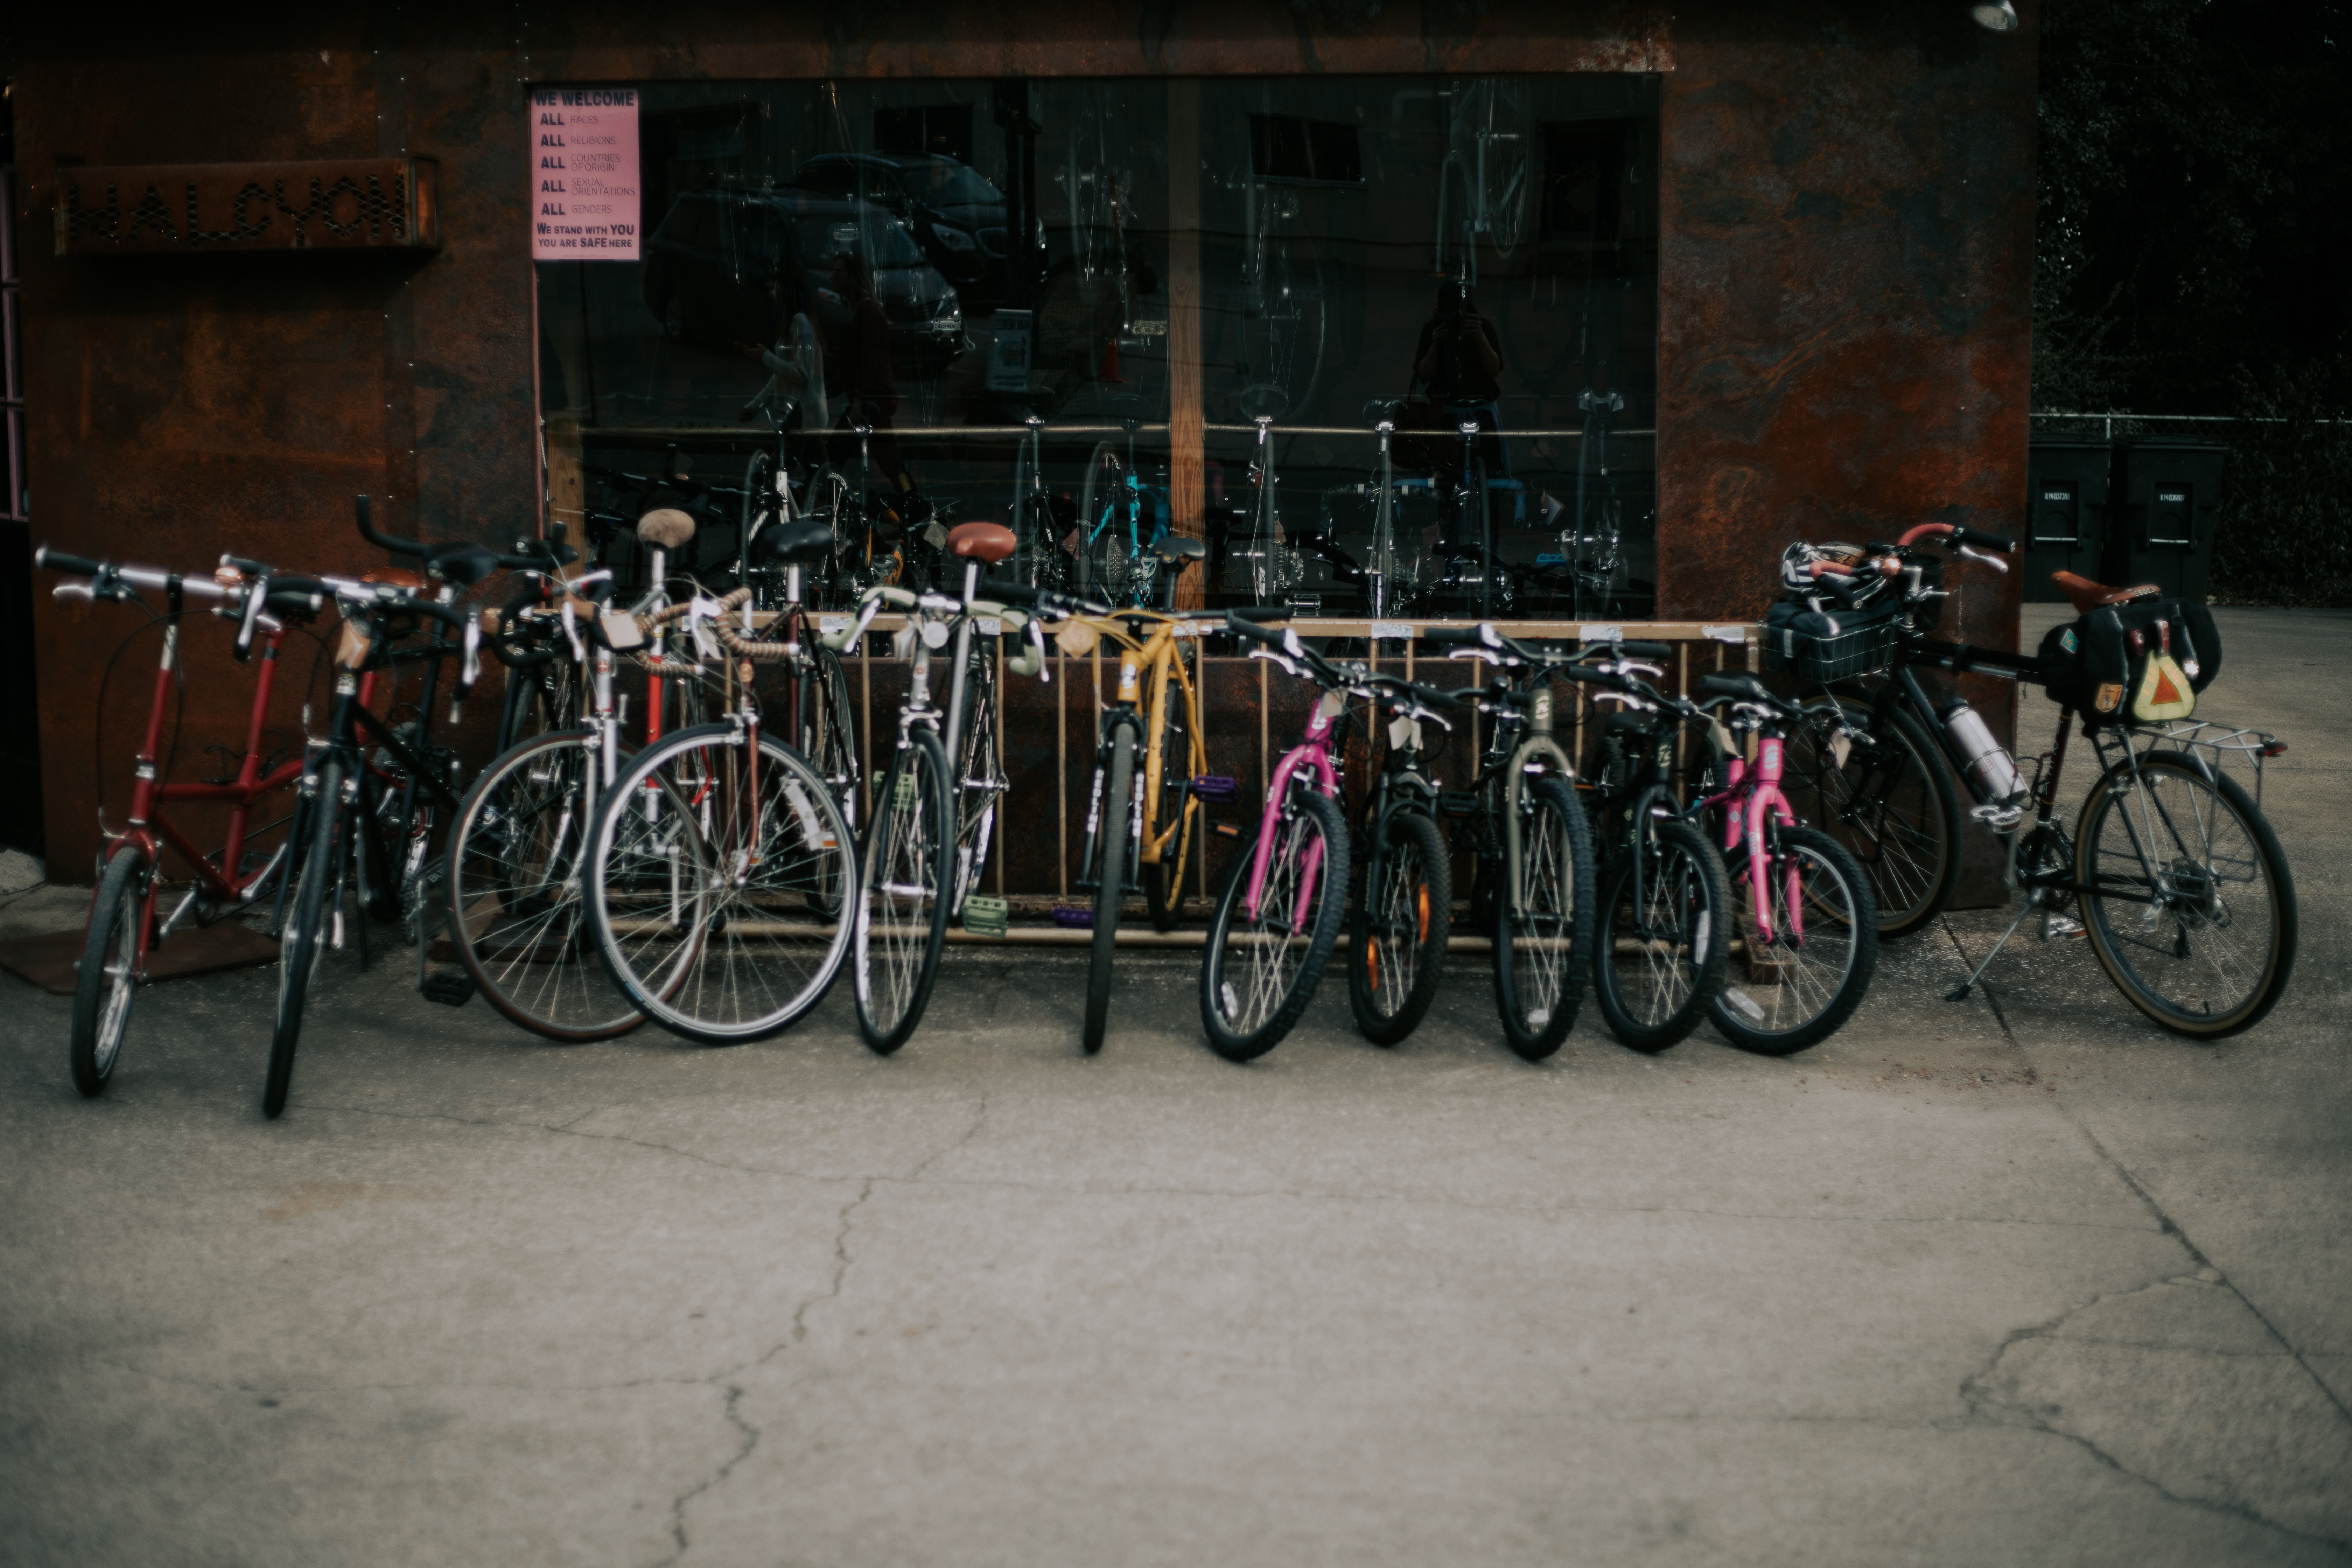

In [52]:
display(Image(filename="img/bikeshop.jpg"))

#reference : 
#https://unsplash.com/photos/zbUH21c9ARk?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink

- $\alpha$ : is the inventory in the store (On-Hand Inventory at 6pm)
- $\beta$ : is the inventory on a truck from the supplier (that you had ordered teh previous day)
- Observe State $S_t: (\alpha, \beta)$ at 6pm store closing
- Order Quantity: = $max(C-(\alpha + \beta), 0)$ immdeiately after 6pm
- Receive inventory at 6am if you had ordered 36 hrs ago
- Open the store at 8pm
- Experience random demand $i$ with poisson probabilities:
  $$f(i) = \frac{e^{-\lambda}\lambda^i}{i!}$$
- Close the store at 6pm
- Observe new state $S_{t+1}: (\alpha, \beta)$ 

### Easier Explanation of Markov Process: 

In [27]:
from typing import Dict
from scipy.stats import poisson


In [28]:

MarkovProcessDict = {"Current State A":{"Next State 1, from A": "Probability of Next State 1, from A",
                                        "Next State 2, from A": "Probability of Next State 2, from A"},
                    
                     "Current State B":{"Next State 1, from B": "Probability of Next State 1, from B",
                                        "Next State 2, from B": "Probability of Next State 2, from B" }}


In [29]:
MarkovProcessDict: Dict[tuple, Dict[tuple, float]] = {}

user_capacity = 2
user_poisson_lambda = 1.0

In [30]:
for alpha in range(user_capacity+1):
    for beta in range(user_capacity + 1 - alpha):

        state = (alpha, beta)

        initial_inventory = alpha + beta

        beta1 = user_capacity - initial_inventory
        
        for i in range(initial_inventory +1):


            if i <= (initial_inventory-1):
                
                transition_prob = poisson.pmf(i,user_poisson_lambda)
                
                if state in MarkovProcessDict:
                    
                    MarkovProcessDict[state][(initial_inventory - i, beta1)]= transition_prob
                
                else:
                    
                    MarkovProcessDict[state] = {(initial_inventory - i, beta1):transition_prob }
                         
            else:
                
                transition_prob = 1- poisson.cdf(initial_inventory -1, user_poisson_lambda)

                if state in MarkovProcessDict:
                    
                    MarkovProcessDict[state][(0, beta1)]= transition_prob
                    
                else:

                    MarkovProcessDict[state] = {(0, beta1 ):transition_prob }str(s1)

In [31]:
for (state, value) in MarkovProcessDict.items():
    
    print("The Current state is {}".format(state))

    for (next_state, trans_prob) in value.items():

        print("The Next State is  {} with Probability of {:.2f}".format(next_state, trans_prob))

    #print(state)
    #print(value)

The Current state is (0, 0)
The Next State is  (0, 2) with Probability of 1.00
The Current state is (0, 1)
The Next State is  (1, 1) with Probability of 0.37
The Next State is  (0, 1) with Probability of 0.63
The Current state is (0, 2)
The Next State is  (2, 0) with Probability of 0.37
The Next State is  (1, 0) with Probability of 0.37
The Next State is  (0, 0) with Probability of 0.26
The Current state is (1, 0)
The Next State is  (1, 1) with Probability of 0.37
The Next State is  (0, 1) with Probability of 0.63
The Current state is (1, 1)
The Next State is  (2, 0) with Probability of 0.37
The Next State is  (1, 0) with Probability of 0.37
The Next State is  (0, 0) with Probability of 0.26
The Current state is (2, 0)
The Next State is  (2, 0) with Probability of 0.37
The Next State is  (1, 0) with Probability of 0.37
The Next State is  (0, 0) with Probability of 0.26


In [48]:
import graphviz  

d = graphviz.Digraph(node_attr={'color': 'lightblue2', 'style': 'filled'}, 
                    )
d.attr(size='10,10')

d.attr(layout = "circo")

for s, v in MarkovProcessDict.items():

        for s1, p in v.items():
            
            d.edge("(\u03B1={}, \u03B2={})".format(s[0],s[1]), 
                   "(\u03B1={}, \u03B2={})".format(s1[0],s1[1]), label=str(round(p,2)), color="red")

print(d)

digraph {
	node [color=lightblue2 style=filled]
	size="10,10"
	layout=circo
	"(α=0, β=0)" -> "(α=0, β=2)" [label=1.0 color=red]
	"(α=0, β=1)" -> "(α=1, β=1)" [label=0.37 color=red]
	"(α=0, β=1)" -> "(α=0, β=1)" [label=0.63 color=red]
	"(α=0, β=2)" -> "(α=2, β=0)" [label=0.37 color=red]
	"(α=0, β=2)" -> "(α=1, β=0)" [label=0.37 color=red]
	"(α=0, β=2)" -> "(α=0, β=0)" [label=0.26 color=red]
	"(α=1, β=0)" -> "(α=1, β=1)" [label=0.37 color=red]
	"(α=1, β=0)" -> "(α=0, β=1)" [label=0.63 color=red]
	"(α=1, β=1)" -> "(α=2, β=0)" [label=0.37 color=red]
	"(α=1, β=1)" -> "(α=1, β=0)" [label=0.37 color=red]
	"(α=1, β=1)" -> "(α=0, β=0)" [label=0.26 color=red]
	"(α=2, β=0)" -> "(α=2, β=0)" [label=0.37 color=red]
	"(α=2, β=0)" -> "(α=1, β=0)" [label=0.37 color=red]
	"(α=2, β=0)" -> "(α=0, β=0)" [label=0.26 color=red]
}


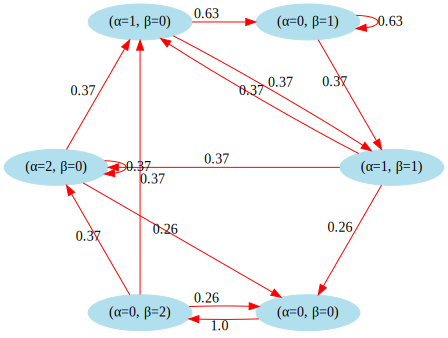

In [49]:
d

In [50]:
d.render('img/MP', format="pdf")

'img/MP.pdf'